# imports

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# Draw beautiful graphics to avoid blurred images
%config InlineBackend.figure_format = 'retina'

# seaborn
- Seaborn is a Python data visualization library based on matplotlib.

# Linechart
- Name of a seaborn **palette** (deep, muted, bright, pastel, dark, colorblind)
- **set_theme()** - uses the matplotlib rcParam system and will affect how all matplotlib plots look
- **context**: affects the size of the labels, lines, and other elements but not the overall style
- available contexts: *paper, notebook, talk, poster*
- **style** parameters control properties like the color of the background and whether a grid is enabled
- styles: *darkgrid, whitegrid, dark, white, ticks*

In [6]:
gapminder = pd.read_csv('data/gapminder.csv')
italy = gapminder[gapminder.country=='Italy']

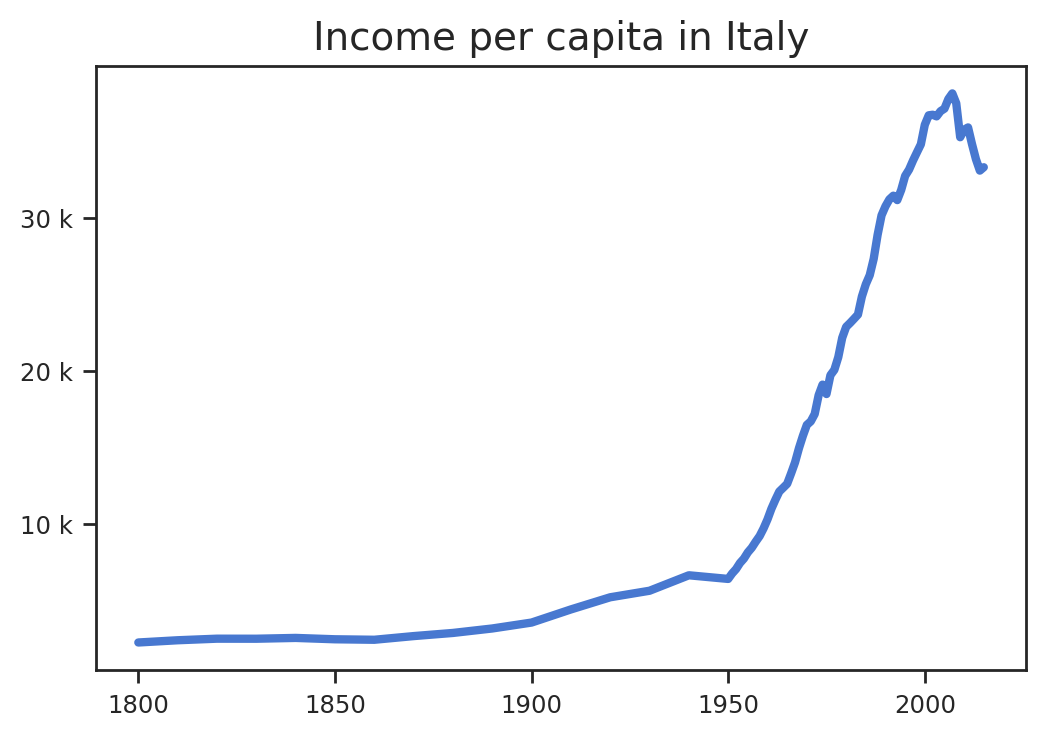

In [7]:
sns.set_theme(context='paper', style="ticks", palette="muted")
# Axes to apply matplot adjustments within the ax
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)

sns.lineplot(x=italy.year, y=italy.gdp_per_capita, linewidth=3)

# title but get rid of other labels since the are selfexplainig
ax.set_title('Income per capita in Italy', fontsize=14);
ax.set_ylabel('')
ax.set_xlabel('')

# fix the y labels
y = [10000,20000,30000]
labels=['10 k', '20 k', '30 k']
plt.yticks(y, labels)

plt.show()

# data preparation

In [32]:
whr = pd.read_csv('data/WHR_2019.csv')
who = pd.read_csv('data/WHO.csv')

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),Population living below the poverty line (% living on &lt; US$1 per day),Population median age (years),Population proportion over 60 (%),Population proportion under 15 (%),Registration coverage of births (%),Total fertility rate (per woman),Antenatal care coverage - at least four visits (%),Antiretroviral therapy coverage among HIV-infected pregt women for PMTCT (%),Antiretroviral therapy coverage among people with advanced HIV infections (%),Births attended by skilled health personnel (%),Births by caesarean section (%),Children aged 6-59 months who received vitamin A supplementation (%),Children aged &lt;5 years sleeping under insecticide-treated nets (%),Children aged &lt;5 years who received any antimalarial treatment for fever (%),Children aged &lt;5 years with ARI symptoms taken to facility (%),Children aged &lt;5 years with diarrhoea receiving ORT (%),Contraceptive prevalence (%),Neonates protected at birth against neonatal tetanus (PAB) (%),One-year-olds immunized with MCV,One-year-olds immunized with three doses of diphtheria tetanus toxoid and pertussis (DTP3) (%),One-year-olds immunized with three doses of Hepatitis B (HepB3) (%),One-year-olds immunized with three doses of Hib (Hib3) vaccine (%),Tuberculosis detection rate under DOTS (%),Tuberculosis treatment success under DOTS (%),Women who have had mammography (%),Women who have had PAP smear (%),Community and traditional health workers density (per 10 000 population),Dentistry personnel density (per 10 000 population),Environment and public health workers density (per 10 000 population),External resources for health as percentage of total expenditure on health,General government expenditure on health as percentage of total expenditure on health,General government expenditure on health as percentage of total government expenditure,Hospital beds (per 10 000 population),Laboratory health workers density (per 10 000 population),Number of community and traditional health workers,Number of dentistry personnel,Number of environment and public health workers,Number of laboratory health workers,Number of nursing and midwifery personnel,Number of other health service providers,Number of pharmaceutical personnel,Number of physicians,Nursing and midwifery personnel density (per 10 000 population),Other health service providers density (per 10 000 population),Out-of-pocket expenditure as percentage of private expenditure on health,Per capita government expenditure on health (PPP int. $),Per capita government expenditure on health at average exchange rate (US$),Per capita total expenditure on health (PPP int. $),Per capita total expenditure on health at average exchange rate (US$),Pharmaceutical personnel density (per 10 000 population),Physicians density (per 10 000 population),Private expenditure on health as percentage of total expenditure on health,Private prepaid plans as percentage of private expenditure on health,Ratio of health management and support workers to health service providers,Ratio of nurses and midwives to physicians,Social security expenditure on health as percentage of general government expenditure on health,Total expenditure on health as percentage of gross domestic product,Births attended by skilled health personnel (%) highest educational level of mother,Births attended by skilled health personnel (%) highest wealth quintile,Births attended by skilled health personnel (%) lowest educational level of mother,Births attended by skilled health personnel (%) lowest wealth quintile,Bir

## merge

In [ ]:
# rename 'United States of America' for better merging 
# iat allows to access a single value for a row/column pair
who.iat[ 192, 0] = 'United States'

whr_who = whr.merge(who,
                    left_on="Country or region",
                    right_on="Country",
                    how='outer')

## display.max_columns

In [ ]:
pd.set_option('display.max_columns', None)
whr_who[:40]

## data cleaning

In [ ]:
emissions = whr_who[[
    'Country', 'Continent', 'Score', 'Total_CO2_emissions', 'GDP per capita',
    'Population (in thousands) total', 'Perceptions of corruption',
    'Healthy life expectancy (HALE) at birth (years) both sexes'
]].sort_values('Total_CO2_emissions',
               ascending=False).dropna(subset='Total_CO2_emissions')

# rename columns
emissions.columns = [
    'Country', 'Continent_no', 'happiness_score', 'emissions', 'gdp_pc',
    'population', 'percepted_corruption', 'HALE'
]

emissions.dropna(inplace=True)

# dict for mapping
Continents = {
    1: "Eastern Mediterranean",
    2: "Europe",
    3: "Africa",
    4: "Americas",
    5: "South America",
    6: "South-East Asia",
    7: "South & Eastern Asia"
}

# emissions['Continent_name'] = emissions.Continent.map(Continents)
emissions.insert(2, 'Continent', emissions.Continent_no.map(Continents)) # inserts the new column at position 2 in the df
emissions['emissions_pc'] = emissions.emissions / (emissions.population * 1000)

# rearrange column order
emissions.columns.tolist()
new_cols = [
    'Country', 'Continent_no', 'Continent', 'happiness_score', 'gdp_pc',
    'emissions', 'emissions_pc', 'population', 'percepted_corruption', 'HALE'
]
emissions = emissions[new_cols]
emissions

In [40]:
emissions.sort_values('happiness_score', ascending=False)[:4]

,Country,Continent,Continent_name,happiness_score,emissions,emissions_pc,gdp_pc,population,percepted_corruption,HALE
0,Finland,2.0,Europe,7.769,53160.98,0.010105,1.340,5261.0,0.393,71.0
1,Denmark,2.0,Europe,7.600,46078.47,0.008486,1.383,5430.0,0.410,70.0
2,Norway,2.0,Europe,7.554,52915.49,0.011333,1.488,4669.0,0.341,72.0
3,Iceland,2.0,Europe,7.494,2183.74,0.007328,1.380,298.0,0.118,73.0


# replot
- relations plot can switch betwen kind = 'scatter' and 'line' and has a few parameters to encode <br>
features namely:* size, hue, style*.
- source/df is given to the function with data=df and than the features can be called by name
- set_theme can change many aspects of the appearance, context, style, etc can be called seperatly
- height and aspect (the ratio of the width to the height) are used to change the figure size


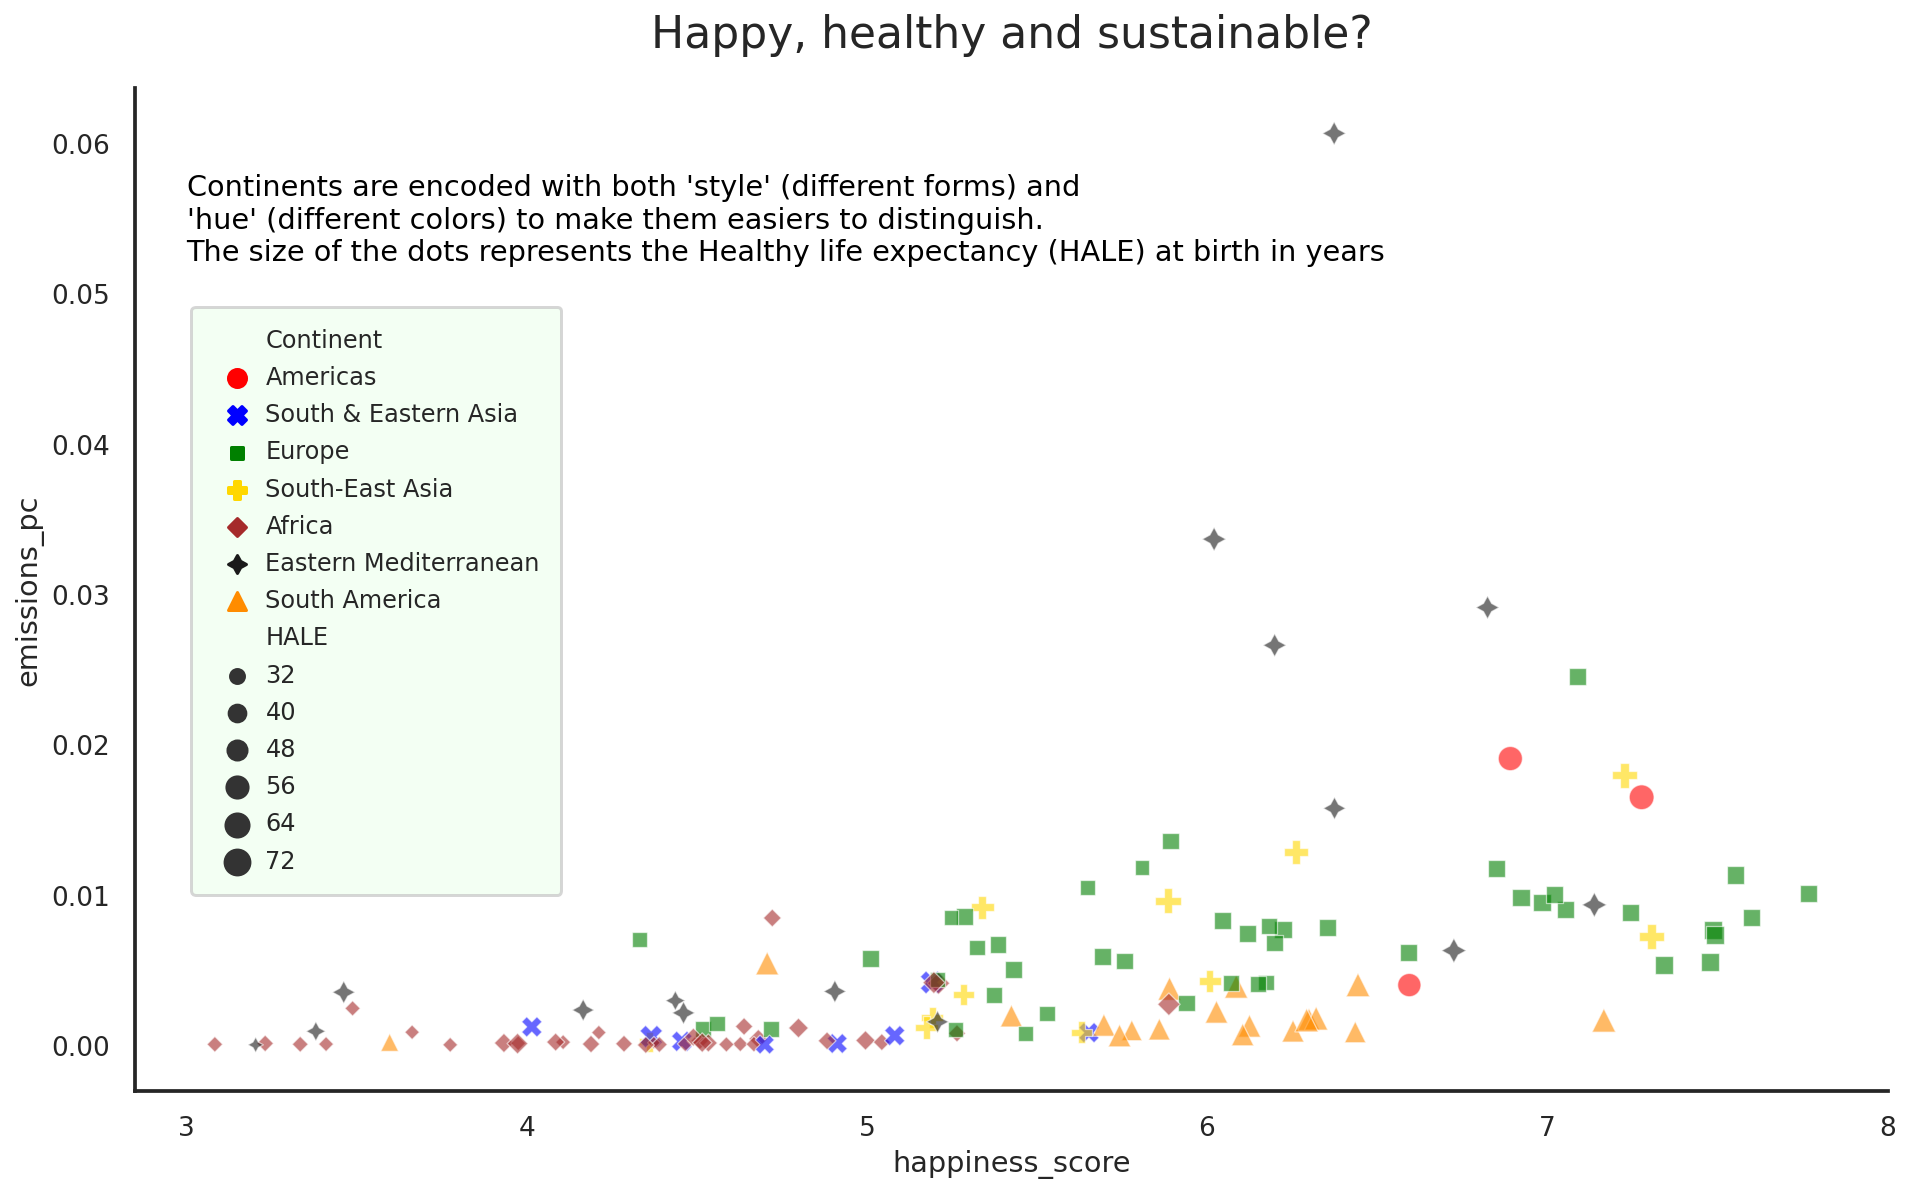

In [46]:
sns.set_theme(context='talk', style='white', font='sans-serif', font_scale=0.8)

# color mapping dict
hue_colors = {
    'Eastern Mediterranean': 'k',
    'Europe': 'green',
    'Africa': 'brown',
    'Americas': 'red',
    'South America': 'darkorange',
    'South-East Asia': 'gold',
    'South & Eastern Asia': 'blue',
}

plot = sns.relplot(
    data=emissions,
    kind='scatter',
    x="happiness_score",
    y="emissions_pc",
    style='Continent',
    hue='Continent',
    size='HALE',
    alpha=0.6,  # transparency
    height=8,
    aspect=1.7,
    palette=hue_colors)

sns.move_legend(plot,
    loc=(0.1, 0.25),
    fontsize=12,
    frameon=True,
    facecolor='honeydew',
    labelspacing=0.55,
    handletextpad=0.2,
    borderpad=0.9)

# Texts are aligned relative to their anchor point depending on the properties
# horizontalalignment and verticalalignment
plt.text(
    x=3,
    y=0.058,
    s="Continents are encoded with both 'style' (different forms) and \n'hue' (different colors) to make \
them easiers to distinguish. \nThe size of the dots represents the Healthy life expectancy (HALE) at birth in years",
    ha='left',
    va='top',
    size='medium',
    color='black',
    fontweight=12)

plt.title("Happy, healthy and sustainable?", fontsize=22, pad=20)
plt.show()

## Subgraphs
- relplot is a graph-level function, it generates a FacetGrid a Multi-plot grid for plotting conditional relationships.
- add the parameter, **col**, to indicate that you want to create subgraphs in columns
- variables passed to col should be **discrete** in order to work
- **col_wrap**: tells seaborn how many columns we want in a row.
- **col_order**: specify the order of the categories in the column

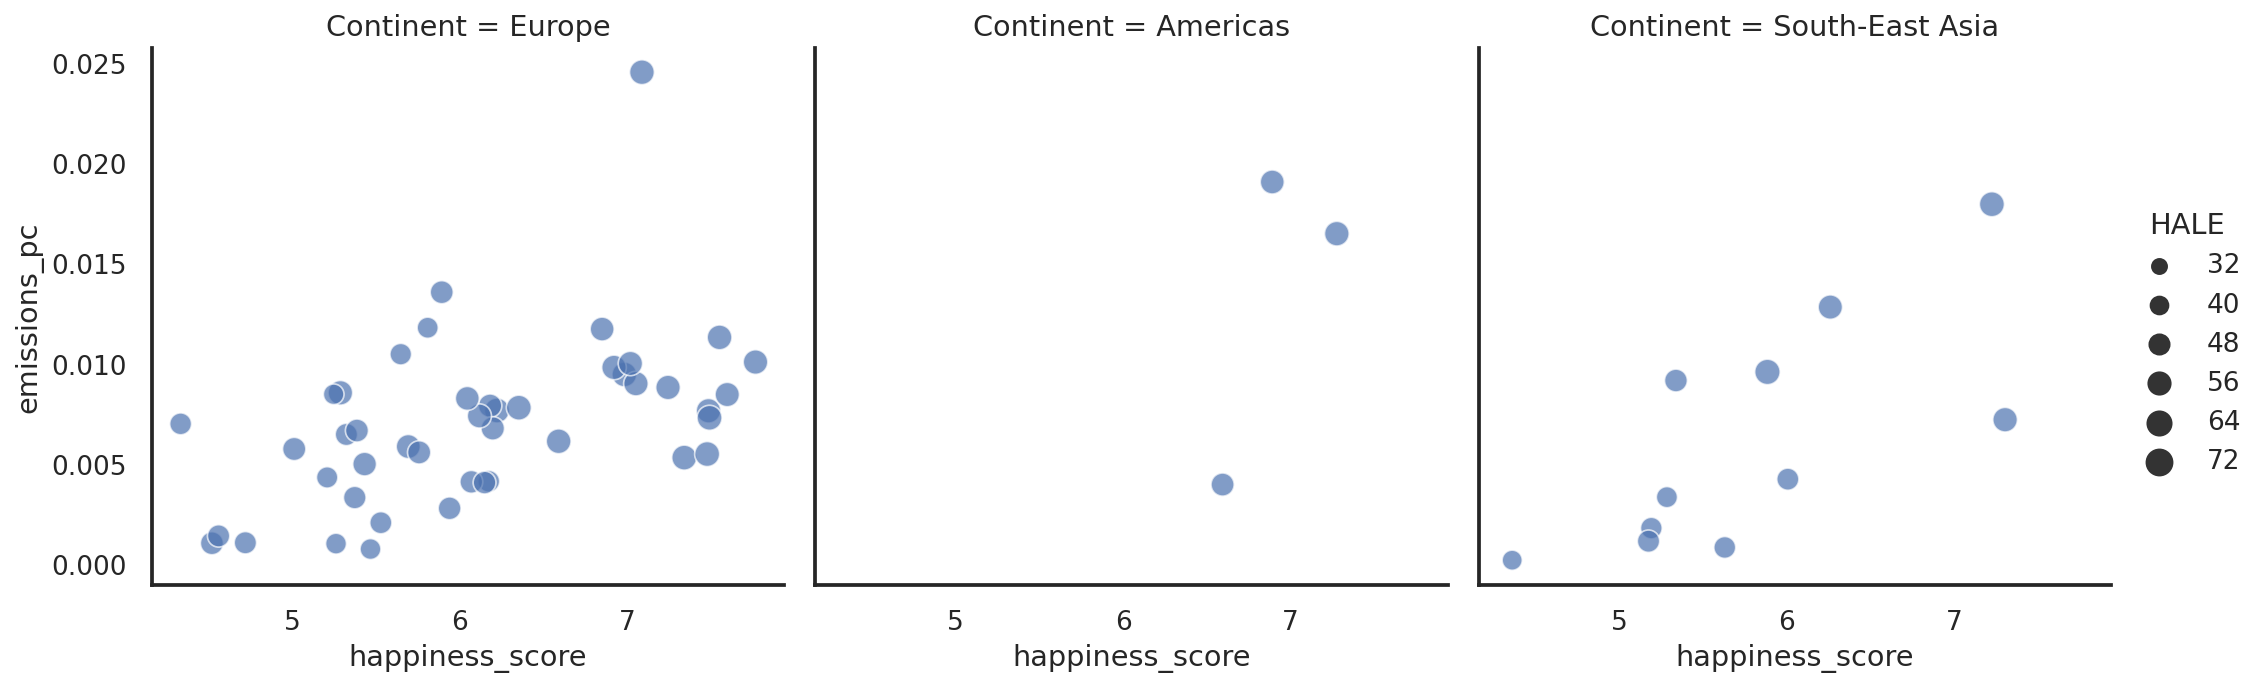

In [53]:
sns.relplot(
        data=emissions,
        kind='scatter',
        x="happiness_score",
        y="emissions_pc",
        size='HALE',
        palette='crest',
        alpha=0.7,
        col='Continent',
        col_order=['Europe', 'Americas', 'South-East Asia'],
        col_wrap=3)

In [22]:
gapminder = pd.read_csv('data/gapminder.csv')

In [24]:
pd.set_option('display.max_columns', None)
gapminder

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.00,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.00,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.00,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.00,647.0,1.771389
...,...,...,...,...,...,...,...,...,...
14735,Zimbabwe,2011,Africa,14255592.0,51.60,90.800,3.64,1626.0,4.451745
14736,Zimbabwe,2012,Africa,14565482.0,54.20,91.330,3.56,1750.0,4.791239
14737,Zimbabwe,2013,Africa,14898092.0,55.70,91.670,3.49,1773.0,4.854209
14738,Zimbabwe,2014,Africa,15245855.0,57.00,91.900,3.41,1773.0,4.854209


In [ ]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left')

['10 k', '20 k', '30 k']

In [ ]:
p = sns.color_palette("Spectral", as_cmap=True)  # built-in diverging palette
sns.relplot(data=emissions,
            kind='scatter',
            x="happiness_score",
            y="emissions_pc",
            style='Continent_name',
            hue='Continent_name',
            size='HALE',
            height=8,
            aspect=1.3,
            palette=hue_colors)
plt.title("Happy, healthy and sustainable?", fontsize=22, pad=20)
plt.show()

In [ ]:
x = gapminder[gapminder.year == 1965]['babies_per_woman']
y = gapminder[gapminder.year == 1965]['age5_surviving']

In [ ]:
sns.relplot(x=x, y=y, color='teal', size=10, legend=False, kind='line', height=6, aspect=1.5);

NameError: name 'sns' is not defined

# palette
- **palette**: Set the matplotlib color cycle using a seaborn palette
- palettes: *deep, muted, bright, pastel, dark, colorblind* or 
  - name of matplotlib colormap or 
  - husl’ or ‘hls’ or -  evenly spaced hues in the “HUSL” system: sns.hls_palette(10, s=.4)
  - ‘light:<color>’, ‘dark:<color>’, ‘blend:<color>,<color>’,
  - uniform colormaps in seaborn: sns.color_palette("flare", as_cmap=True)
  - customized cubehelix color palette: sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
  - Make a diverging palette between two HUSL colors: sns.diverging_palette(240, 10, n=9)
  - Make a palette with color names from Crayola crayons: seaborn.crayon_palette(colors)